#Fundamentos de la ciencia de datos e Inteligencia de negocios 
#Evaluación de aprendizaje Numero 3

**ALUMNO**: Coradini Gonzalo Fabian

**DNI**: 38946395

# Spotify - Análisis de las canciones

##Descripción
Spotify es una aplicación multiplataforma sueca, empleada para la reproducción de música vía streaming. Permite escuchar música en “modo radio”, buscar por artista, álbum o listas de reproducción creadas por los propios usuarios. 

Se cuenta con la información de las canciones que pasaron por la plataforma. Incluye información de cada canción además de las características musicales que la definen, lo que permitirá realizar un análisis más a fondo sobre cada canción y su género en específico.

Se busca analizar esta información para conocer sobre las canciones más populares, artistas preferidos y sus canciones, promedio de duración de las canciones, así como también conocer cuáles son las características musicales que hacen populares a las canciones y buscar predecir las el género de las canciones a partir de las características de audio.

Data: https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db


##Objetivos
* Conocer a fondo los géneros y artistas que marcaron tendencia a través de los años y las canciones más relevantes.
* Buscar patrones musicales que puedan indicar géneros musicales en base a las características de las canciones.


##Carga de datos

Librerias

In [ ]:
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import pydotplus

from sklearn.metrics import confusion_matrix

%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics.scorer import make_scorer
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Se carga el dataset 

In [ ]:
dt_path='https://raw.githubusercontent.com/GCoradini/FCDIN/master/entrenamientoSpotify.csv'
df = pd.read_csv(dt_path, sep =';',na_values="." ,decimal=",")
df.shape

(149999, 18)

Muesto el dataset Cargado

In [ ]:
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Children’s Music,Rage Against The Machine,Sleep Now In the Fire,1MQTmpYOZ6fcMQc56Hdo7T,65,0.00162,0.426,205600,0.929,0.105000,D,0.0789,-6.729,Major,0.0701,127.059,4-abr,0.539
1,Rap,Rage Against The Machine,Sleep Now In the Fire,1MQTmpYOZ6fcMQc56Hdo7T,66,0.00162,0.426,205600,0.929,0.105000,D,0.0789,-6.729,Major,0.0701,127.059,4-abr,0.539
2,Rock,Rage Against The Machine,Sleep Now In the Fire,1MQTmpYOZ6fcMQc56Hdo7T,66,0.00162,0.426,205600,0.929,0.105000,D,0.0789,-6.729,Major,0.0701,127.059,4-abr,0.539
3,Reggae,Mavado,Big Like Jesus,1MqV6t7WeY8yIn7qDR5paJ,45,0.16100,0.876,149002,0.820,0.000142,F,0.0668,-3.885,Minor,0.1660,99.975,4-abr,0.608
4,Dance,Rudimental,Let Me Live - Acoustic,1mqVImA1k8qma45Lqc8CNR,44,0.53900,0.680,218049,0.547,0.000000,G#,0.0877,-4.762,Major,0.0414,142.053,4-abr,0.641


Se eliminaran registros con el mismo id pero que pertenezcan a diferentes géneros.

In [ ]:
df = df.drop_duplicates(subset=['track_id'], keep='last')

Seteo la entrada track_id como index del dataframe

In [ ]:
df = df.set_index(df["track_id"])
df.drop(["track_id"], axis=1, inplace=True)
df.head(5)

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
track_id,,,,,,,,,,,,,,,,,
1MQTmpYOZ6fcMQc56Hdo7T,Rock,Rage Against The Machine,Sleep Now In the Fire,66,0.00162,0.426,205600,0.929,0.105000,D,0.0789,-6.729,Major,0.0701,127.059,4-abr,0.5390
1MqV6t7WeY8yIn7qDR5paJ,Reggae,Mavado,Big Like Jesus,45,0.16100,0.876,149002,0.820,0.000142,F,0.0668,-3.885,Minor,0.1660,99.975,4-abr,0.6080
1mqVImA1k8qma45Lqc8CNR,Dance,Rudimental,Let Me Live - Acoustic,44,0.53900,0.680,218049,0.547,0.000000,G#,0.0877,-4.762,Major,0.0414,142.053,4-abr,0.6410
1MQvks56R8DYB2ToA36qMi,Opera,Giacomo Meyerbeer,"L'Africaine / Act 4: ""Pays Merveilleux ... O P...",9,0.98700,0.237,219027,0.114,0.050400,F#,0.4630,-20.052,Major,0.0407,82.954,3-abr,0.0701
1MQWtVcs0PKsY4PA6ZvLiy,Rock,Sly & The Family Stone,Dance to the Music,61,0.01680,0.703,179427,0.529,0.000573,G,0.9110,-11.112,Major,0.1000,128.057,4-abr,0.7720


Se eliminan las variables que no se encuentren relacionadas con las características de audio de las canciones, ya que no serán tenidas en cuenta.

In [ ]:
df.drop(["time_signature"], axis=1, inplace=True)
df.drop(["artist_name"], axis=1, inplace=True)
df.drop(["track_name"], axis=1, inplace=True)
df.drop(["popularity"], axis=1, inplace=True)
df.shape

(113895, 13)

Información sobre los tipos de las variables

In [ ]:
df.dtypes

genre                object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
valence             float64
dtype: object

Se muestra la información estadistica sobre el dataset cargado

In [ ]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,113895.000000,113895.000000,1.138950e+05,113895.000000,113895.000000,113895.000000,113895.000000,113895.000000,113895.000000,113895.000000
mean,0.404410,0.541072,2.361468e+05,0.556061,0.171383,0.223730,-10.153355,0.127160,117.117857,0.451165
std,0.366434,0.190395,1.325324e+05,0.276169,0.322549,0.210163,6.409536,0.203977,31.263979,0.267748
min,0.000000,0.057200,1.538700e+04,0.000020,0.000000,0.010500,-47.599000,0.022200,31.033000,0.000000
25%,0.045200,0.415000,1.780670e+05,0.342000,0.000000,0.097500,-12.877000,0.036800,92.002000,0.221000
50%,0.289000,0.558000,2.195200e+05,0.591000,0.000071,0.130000,-8.209000,0.049400,114.980000,0.439000
75%,0.791000,0.683000,2.685110e+05,0.789000,0.087600,0.275500,-5.632000,0.101000,138.630500,0.667000
max,0.996000,0.989000,5.488000e+06,0.999000,0.999000,1.000000,1.893000,0.967000,242.903000,1.000000


##Análisis de datos

Se muestra la distribución de los registros del dataset con respecto al género musical.

In [ ]:
print("Distribución en porcentajes")
print(df['genre'].value_counts(normalize = True)*100) 
print("")
print("")
print("Distribución expresada en nominal")
print(df['genre'].value_counts(normalize = False))

Distribución en porcentajes
Comedy              5.439220
Soundtrack          5.336494
World               5.175820
Ska                 5.076606
Soul                5.044998
Reggaeton           5.042364
Children’s Music    5.011634
Classical           4.841301
Anime               4.831643
Rock                4.807059
Jazz                4.715747
Electronic          4.679749
Opera               4.475175
Reggae              4.394398
Country             4.269722
Movie               4.210896
Blues               4.148558
Rap                 3.685851
Pop                 2.970280
Indie               2.940428
Folk                2.741999
R&B                 2.299486
Dance               1.568111
Hip-Hop             1.202862
Alternative         1.018482
A Capella           0.071118
Name: genre, dtype: float64


Distribución expresada en nominal
Comedy              6195
Soundtrack          6078
World               5895
Ska                 5782
Soul                5746
Reggaeton           5743
Chil

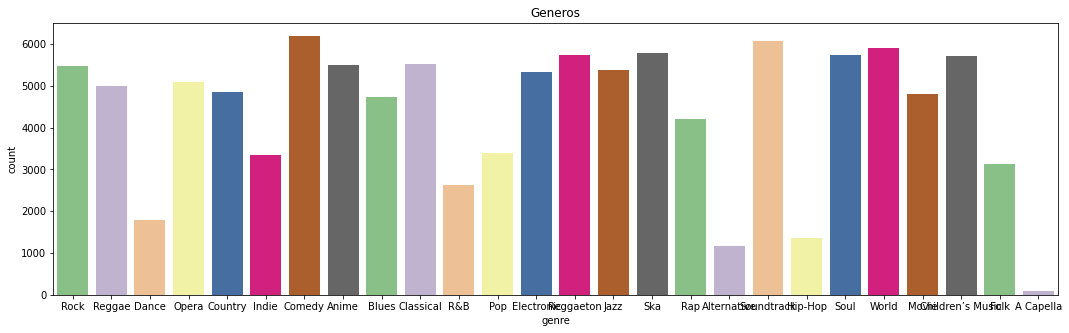

In [ ]:
plt.figure(figsize=(18, 5))
plt.title('Generos')
sns.countplot(x='genre', data=df,  palette="Accent")

###Análisis de valores nulos

Veo la distribución de nulos en las variables

In [ ]:
val_nulos = df.isnull().sum()
print(df.shape)
print(val_nulos)

(113895, 13)
genre               0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
dtype: int64


No se encuentran valores nulos dentro del dataframe

###Análisis de outliers

Se graficara cada variable en graficos y se analizara cada caso

####Acousticness

Indica que tan acústica es la canción. Un valor cercano a 1 indica que la canción es más acústica.

Mediana:  0.289


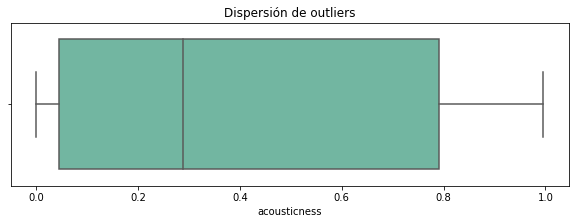

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["acousticness"], orient = 'h', palette="Set2")

print("Mediana: ",df["acousticness"].median())

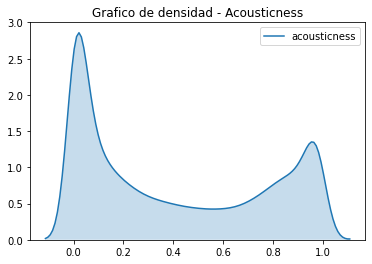

In [ ]:
plt.title('Grafico de densidad - Acousticness')
sns.kdeplot(df['acousticness'], shade=True) 

####Danceability

Indica que tan adecuada es una canción para bailar basándose en su ritmo y tempo. Un valor alto, cercano a 1, indica que la canción es más bailable.

Mediana:  0.5579999999999999


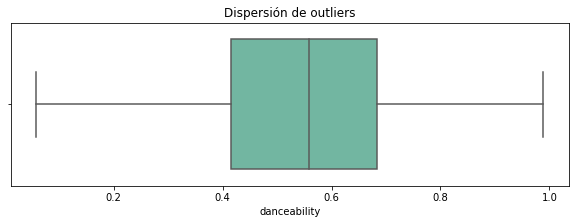

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["danceability"], orient = 'h', palette="Set2")

print("Mediana: ",df["danceability"].median())

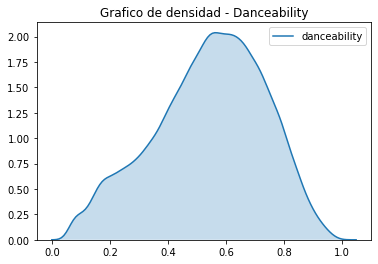

In [ ]:
plt.title('Grafico de densidad - Danceability')
sns.kdeplot(df['danceability'], shade=True) 

Todos los valores se encuentran alrededor de la mediana , no es necesario imputar outliers

####Duration

Duración de la canción en milisegundos

Mediana:  219520.0


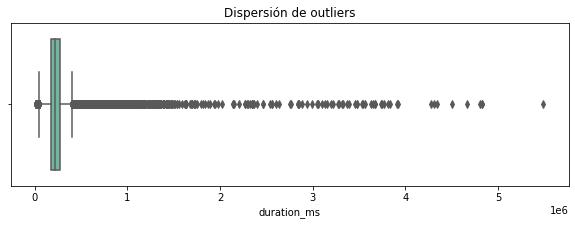

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["duration_ms"], orient = 'h', palette="Set2")

print("Mediana: ",df["duration_ms"].median())

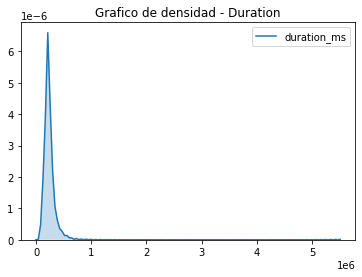

In [ ]:
plt.title('Grafico de densidad - Duration')
sns.kdeplot(df['duration_ms'], shade=True) 

Hay gran cantidad de outliers por derecha. La duración de la canción puede influir en el género. Hay géneros que sus canciones duran en promedio más que otros géneros, esto puede ayudar a determinar el género de la canción.

####Energy

Representa la intensidad de la canción. A mayor valor de energía, las canciones son mas rápidas, mas ruidosas, como por ejemplo canciones de rock o metal son mas ruidosas que canciones clásicas.

Mediana:  0.591


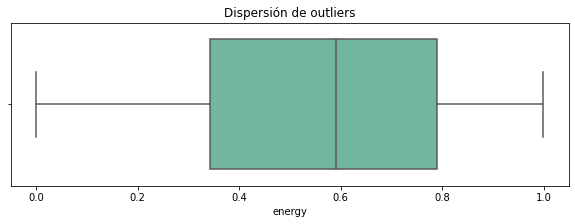

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["energy"], orient = 'h', palette="Set2")

print("Mediana: ",df["energy"].median())

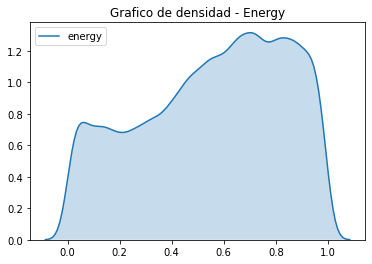

In [ ]:
plt.title('Grafico de densidad - Energy')
sns.kdeplot(df['energy'], shade=True) 

Todos los valores se encuentran alrededor de la mediana , no es necesario imputar outliers

####Instrumentalness

Indica si una canción posee sonidos provenientes de la voz o no sobre la pista. Pistas superiores a 0.5 se consideran instrumentales, aunque la probabilidad aumenta a medida que el valor se acerca a 1.

Mediana:  7.11e-05


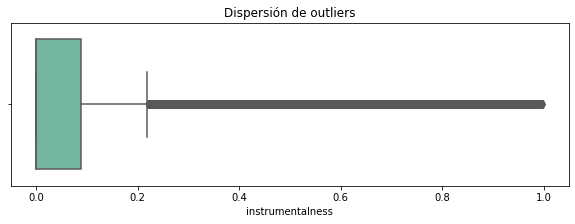

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["instrumentalness"], orient = 'h', palette="Set2")

print("Mediana: ",df["instrumentalness"].median())

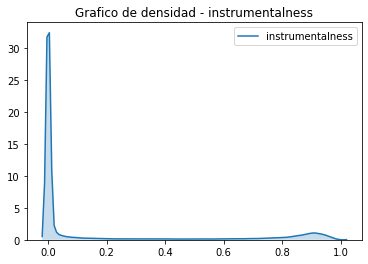

In [ ]:
plt.title('Grafico de densidad - instrumentalness')
sns.kdeplot(df['instrumentalness'], shade=True) 

Esta variable posee una gran cantidad de valores outliers por izquierda , pero estos indican la cantidad de voces que hay sobre una pista. Pueden existir géneros donde no hay voces sobre la canción y otras sí.

####Liveness

Indica si la pista se grabo en vivo o en un estudio. Un valor superior a 0,8 indicaría, con gran probabilidad, que la pista fue grabada en vivo.

Mediana:  0.13


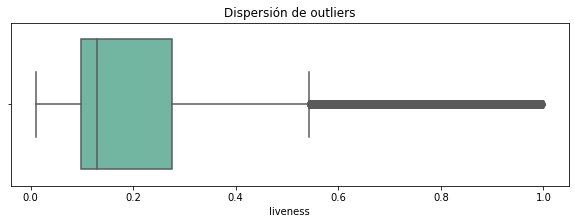

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["liveness"], orient = 'h', palette="Set2")

print("Mediana: ",df["liveness"].median())

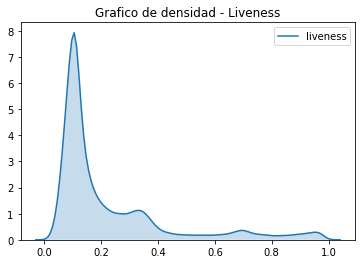

In [ ]:
plt.title('Grafico de densidad - Liveness')
sns.kdeplot(df['liveness'], shade=True) 

####Loudness

Indica el volumen general, en decibelios (dB), de la pista.

Mediana:  -8.209


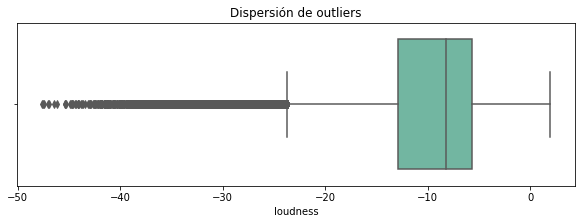

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["loudness"], orient = 'h', palette="Set2")

print("Mediana: ",df["loudness"].median())

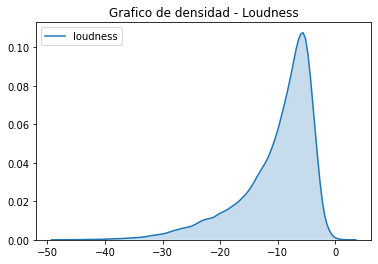

In [ ]:
plt.title('Grafico de densidad - Loudness')
sns.kdeplot(df['loudness'], shade=True) 

Esta variable posee una gran cantidad de valores outliers por izquierda. En la predicción de géneros un volumen alto puede corresponder a pistas de rock y un volumen bajo a canciones para chicos, por ejemplo. 

####Speechiness

Indica la presencia de palabras habladas en la canción. Valores superiores a 0.66 indican que la pista posee muchas palabras durante toda la pista. Cuando el valor sea cercano a 1, indica que la canción posee una gran cantidad de palabras.

Mediana:  0.0494


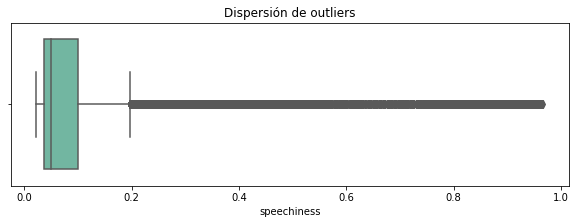

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["speechiness"], orient = 'h', palette="Set2")

print("Mediana: ",df["speechiness"].median())

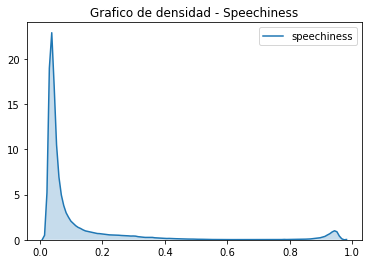

In [ ]:
plt.title('Grafico de densidad - Speechiness')
sns.kdeplot(df['speechiness'], shade=True) 

Otra variable que posee outliers. La cantidad de palabras que posee una canción puede influir en su género. Quizás pocas palabras puede indicar el género de música clásica y muchas indicaría Hip Hop o Rap.

####Tempo

Indica el ritmo, velocidad de la pista. Esta se deriva de la duración promedio de la pista.

Mediana:  114.98


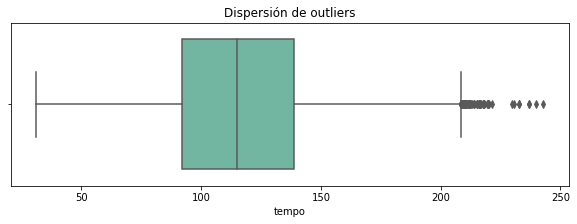

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["tempo"], orient = 'h', palette="Set2")

print("Mediana: ",df["tempo"].median())

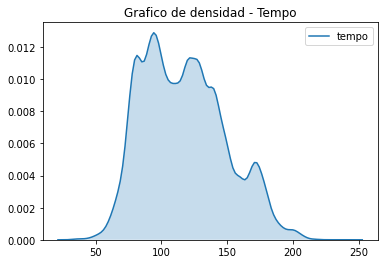

In [ ]:
plt.title('Grafico de densidad - Tempo')
sns.kdeplot(df['tempo'], shade=True) 

Variable que posee pocos outliers por derecha. Gran parte de sus valores se encuentra distribuido alrededor de la mediana. Los géneros pueden tener ritmos que los identifiquen.

####Valence

Indica la positividad de la pista de la canción. Una canción más positiva (más alegre) tiene valores cercanos a 1, mientras que cuanto más cercano sea el valor a 0, la canción será más triste y depresiva.

Mediana:  0.439


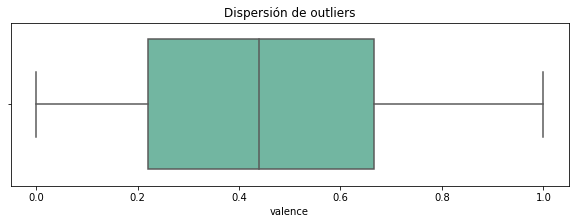

In [ ]:
plt.figure(figsize=(10, 3))
plt.title('Dispersión de outliers')
sns.boxplot(df["valence"], orient = 'h', palette="Set2")

print("Mediana: ",df["valence"].median())

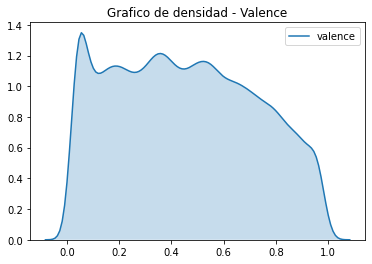

In [ ]:
plt.title('Grafico de densidad - Valence')
sns.kdeplot(df['valence'], shade=True) 

###Correlación de las características de audio con el género

####Acousticness

[]

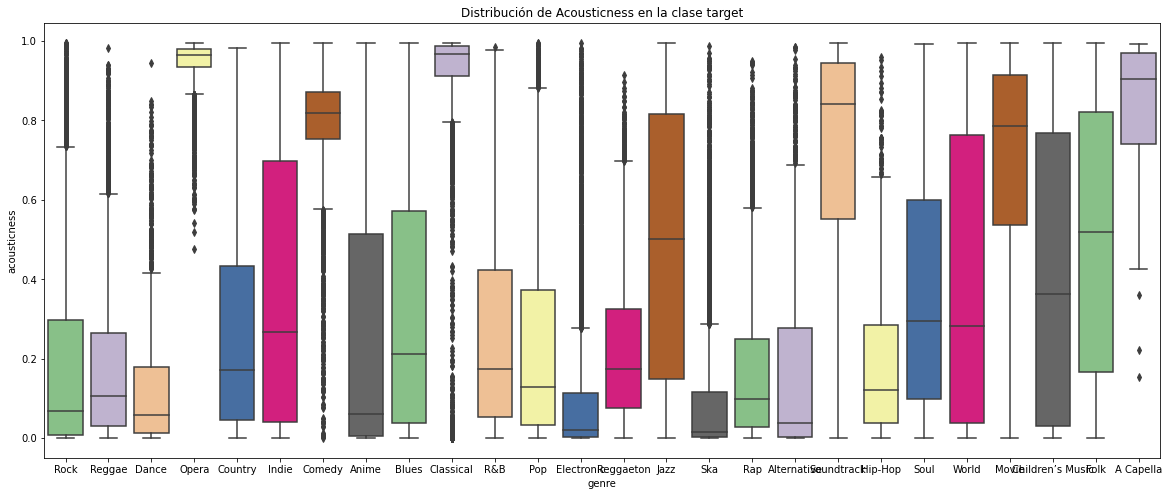

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Distribución de Acousticness en la clase target')
s=sns.boxplot(x="genre", y="acousticness", data=df,  palette="Accent")
s.plot()

Canciones _Clásicas_, de _Opera_, _Soundtracks_ y _A Capella_ son más acústicas que los demás géneros.

Las canciones de _Ska_ , _Electrónicas_, _Dance_ y _Reggae_ no son tan acústicas.

####Danceability

[]

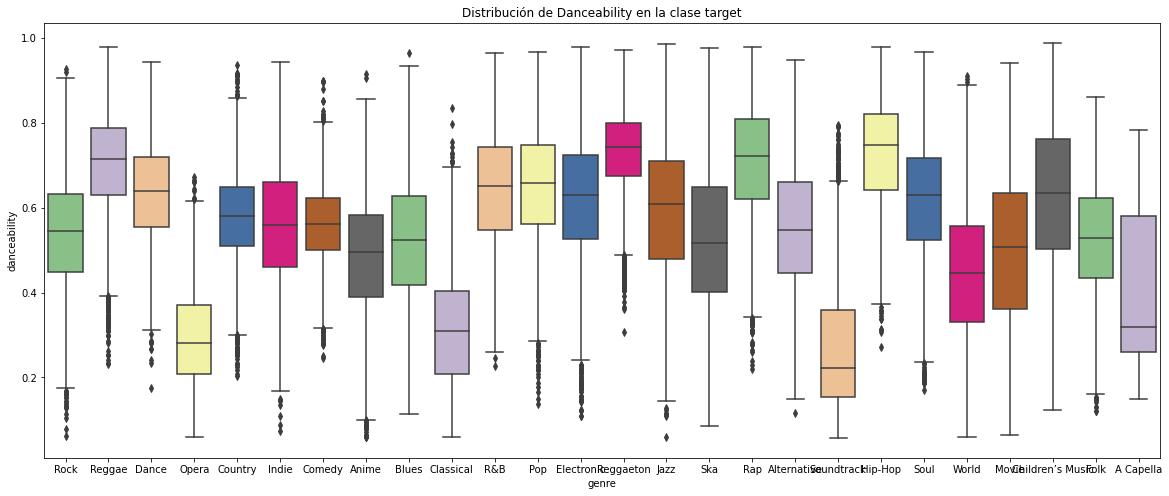

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Distribución de Danceability en la clase target')
s=sns.boxplot(x="genre", y="danceability", data=df,  palette="Accent")
s.plot()

_Soundtracks_, _Opera_, _Clasico_ y _A Capella_ no son géneros muy bailables

####Energy

[]

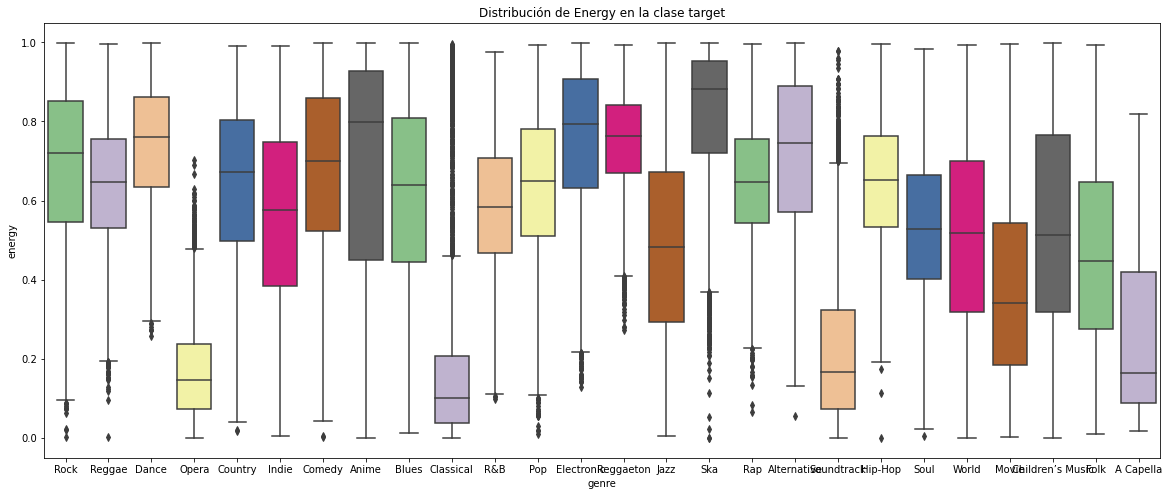

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Distribución de Energy en la clase target')
s=sns.boxplot(x="genre", y="energy", data=df,  palette="Accent")
s.plot()

Canciones de _Opera_, _Clasico_, _Soundtrack_ y _A Capella_ no son tan energeticas.

####Instrumentalness

[]

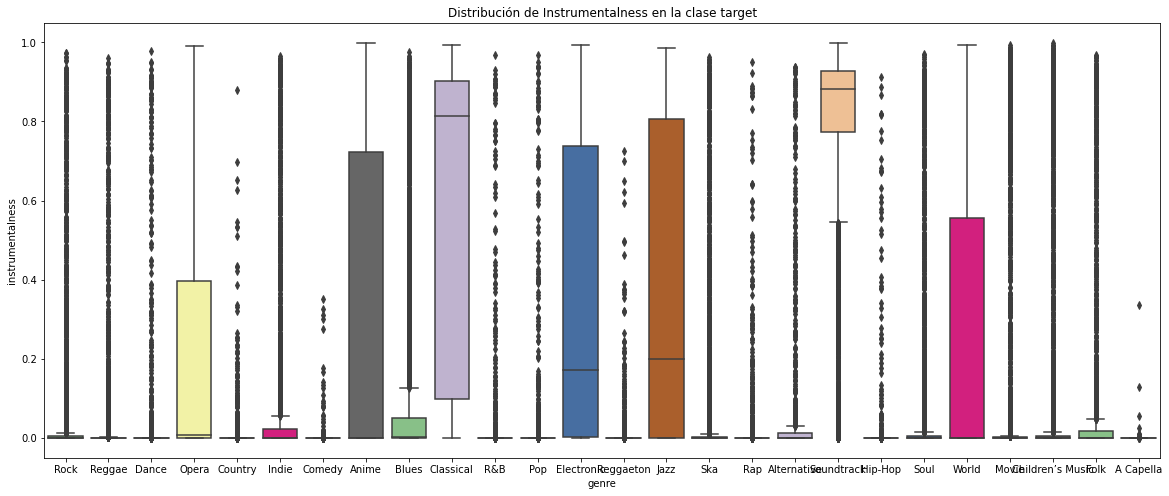

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Distribución de Instrumentalness en la clase target')
s=sns.boxplot(x="genre", y="instrumentalness", data=df,  palette="Accent")
s.plot()

####Liveness

[]

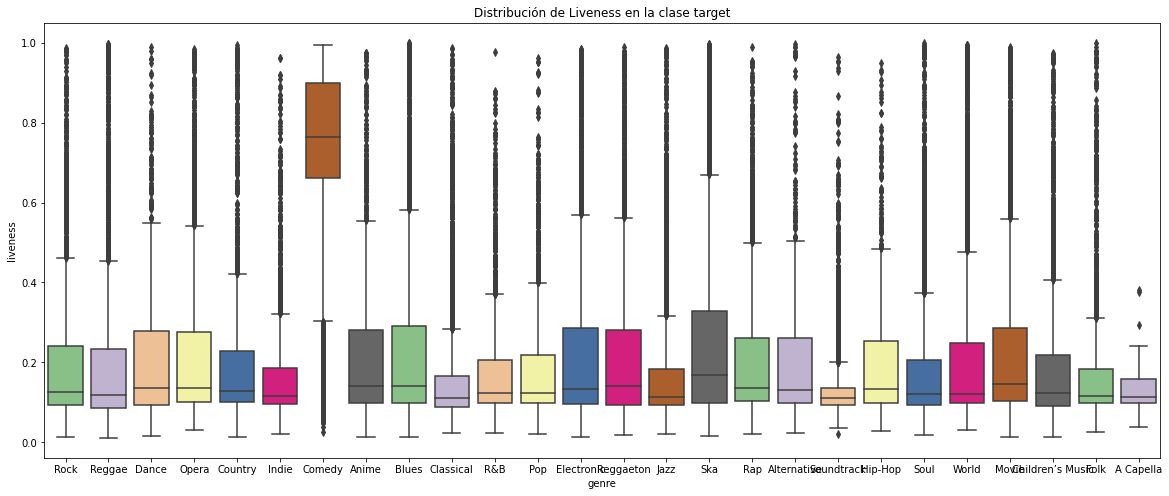

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Distribución de Liveness en la clase target')
s=sns.boxplot(x="genre", y="liveness", data=df,  palette="Accent")
s.plot()

El género _Comedia_ es el más grabado en vivo

####Loudness

[]

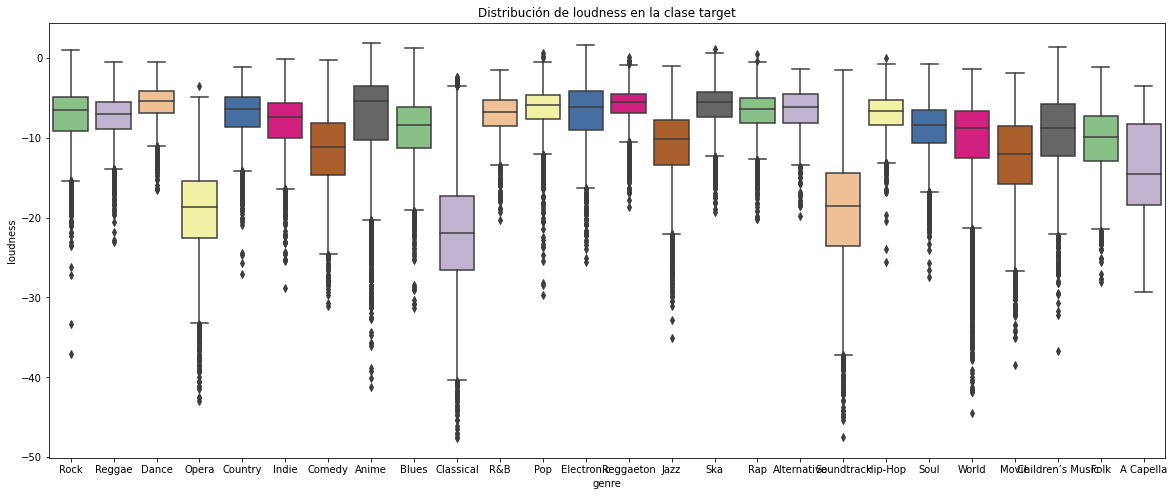

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Distribución de loudness en la clase target')
s=sns.boxplot(x="genre", y="loudness", data=df,  palette="Accent")
s.plot()

####Speechiness

[]

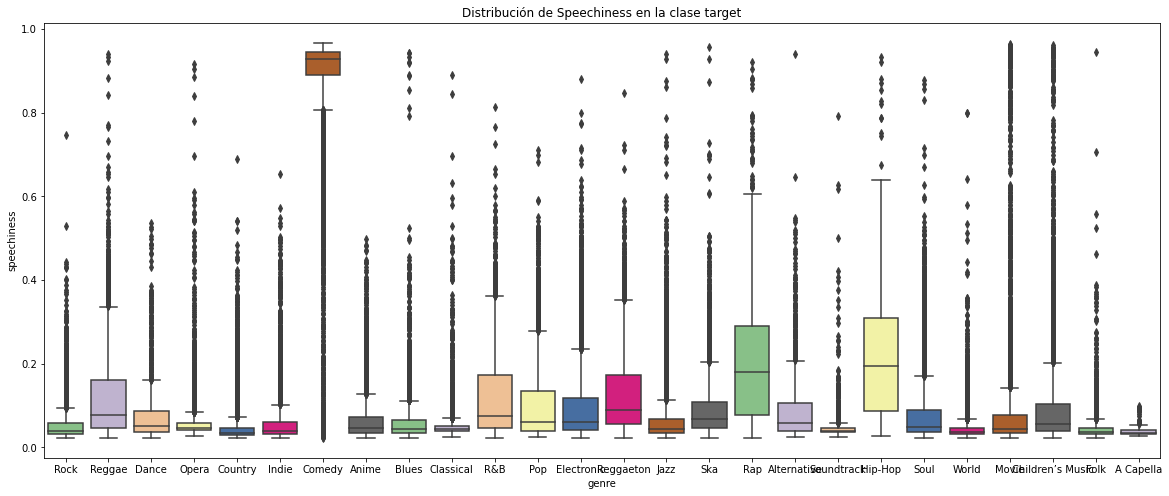

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Distribución de Speechiness en la clase target')
s=sns.boxplot(x="genre", y="speechiness", data=df,  palette="Accent")
s.plot()

Se ve como el género _comedia_ es el que más palabras sobre la pista.

####Tempo

[]

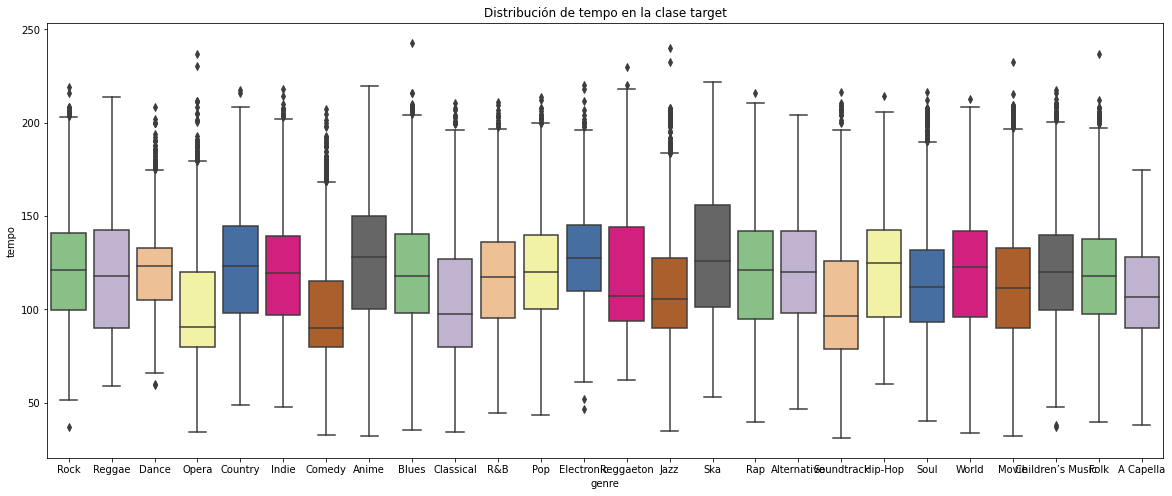

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Distribución de tempo en la clase target')
s=sns.boxplot(x="genre", y="tempo", data=df,  palette="Accent")
s.plot()

En este caso las variables poseen casi la misma distribución para cada género.

####Valence

[]

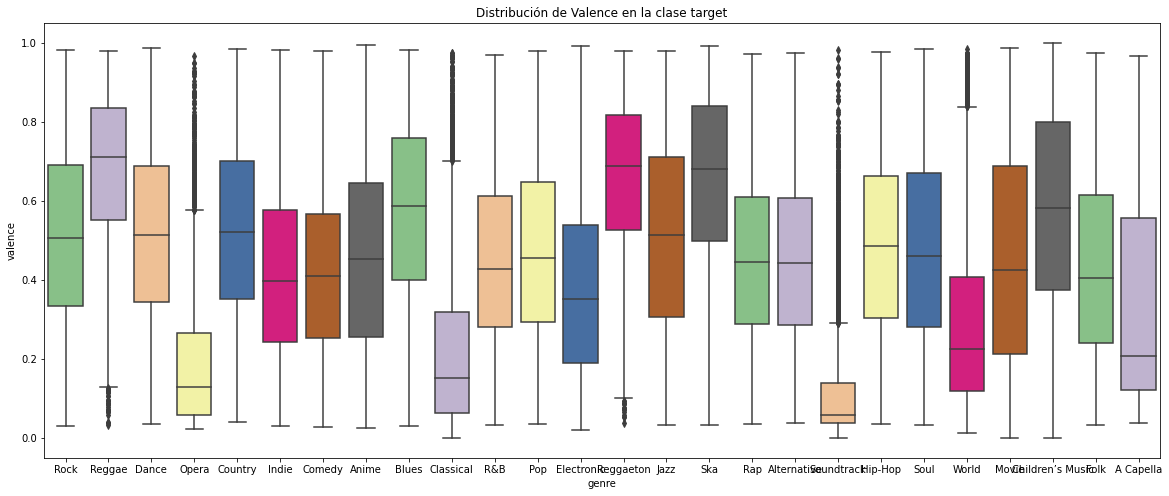

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Distribución de Valence en la clase target')
s=sns.boxplot(x="genre", y="valence", data=df,  palette="Accent")
s.plot()

Canciones de _Opera_, _Clasicas_ y _Soundtracks_ no son canciones muy positivas._Canciones para chicos_, _Reggae_, _Ska_ y _Reggaeton_ son los géneros con más positivismo.

##Preparación de datos

###Imputación de outliers

Se imputan outliers por la media de los valores en las variables analizadas anteriormente.

In [ ]:
def preparacion_de_datos(df):

  def calcular_media(dff, c, min=None, max=None):
    minimo = dff[c].min() if min==None else min
    maximo = dff[c].max() if max==None else max
    dff2 = dff[(dff[c]>=minimo) & (dff[c]<=maximo)]
    return dff2[c].mean()

  #Se imputan las variable duration_ms:
  outlier_superior = df['duration_ms'].mean() + 1.5*df['duration_ms'].std()
  media_sin_outliers = calcular_media(df, 'duration_ms', max=outlier_superior)
  df['duration_ms'] = df.apply(lambda x: media_sin_outliers if x['duration_ms']>outlier_superior else x['duration_ms'], axis=1)

  #Se imputan las variable instrumentalness:
  outlier_superior = df['instrumentalness'].mean() + 2*df['instrumentalness'].std()
  media_sin_outliers = calcular_media(df, 'instrumentalness', max=outlier_superior)
  df['instrumentalness'] = df.apply(lambda x: media_sin_outliers if x['instrumentalness']>outlier_superior else x['instrumentalness'], axis=1)

  #Se imputan las variable liveness:
  outlier_superior = df['liveness'].mean() + 3*df['liveness'].std()
  media_sin_outliers = calcular_media(df, 'liveness', max=outlier_superior)
  df['liveness'] = df.apply(lambda x: media_sin_outliers if x['liveness']>outlier_superior else x['liveness'], axis=1)

  #Se imputan las variable loudness:
  outlier_inferior = df['loudness'].mean() - 3*df['loudness'].std()
  media_sin_outliers = calcular_media(df, 'loudness', min=outlier_inferior)
  df['loudness'] = df.apply(lambda x: media_sin_outliers  if x['loudness']<outlier_inferior else x['loudness'], axis=1)

  #Se imputan las variable speechiness:
  outlier_superior = df['speechiness'].mean() + 3*df['speechiness'].std()
  media_sin_outliers = calcular_media(df, 'speechiness', max=outlier_superior)
  df['speechiness'] = df.apply(lambda x: media_sin_outliers if x['speechiness']>outlier_superior else x['speechiness'], axis=1)

  #Se imputan las variable tempo:
  outlier_superior = df['tempo'].mean() + 3*df['tempo'].std()
  media_sin_outliers = calcular_media(df, 'tempo', max=outlier_superior)
  df['tempo'] = df.apply(lambda x: media_sin_outliers if x['tempo']>outlier_superior else x['tempo'], axis=1)

  return df

In [ ]:
df = preparacion_de_datos(df)

In [ ]:
df.shape

(113895, 13)

###Estandarización de las variables

Se transforman las variables categóricas a numéricas

In [ ]:
mode_dict = {'Major' : 1, 'Minor' : 0}
key_dict = {'C' : 1, 'C#' : 2, 'D' : 3, 'D#' : 4, 'E' : 5, 'F' : 6, 'F#' : 7, 'G' : 9, 'G#' : 10, 'A' : 11, 'A#' : 12, 'B' : 12}

df['mode'].replace(mode_dict, inplace=True)
df['key'] = df['key'].replace(key_dict).astype(int)

Se estandarizan variables ya que se tienen variables en diferentes escalas y se separa el dataset en entrenamiento y pruebas.

In [ ]:
scaler_X = StandardScaler(with_mean=True, with_std=True) 
scaler_X.fit(df.drop(["genre"],axis = 1))
X_df = pd.DataFrame(scaler_X.transform(df.drop(["genre"],axis = 1),),columns = df.drop("genre", axis=1).columns)  
X_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,-1.099221,-0.604386,-0.230486,1.350406,-0.205809,-0.922080,-0.689136,0.534262,0.718031,-0.279739,0.317976,0.328052
1,-0.664270,1.759132,-0.657539,0.955719,-0.530902,-0.146429,-0.746711,0.977978,-1.392697,0.190413,-0.548329,0.585758
2,0.367299,0.729689,-0.136554,-0.032809,-0.531342,0.887772,-0.647264,0.841150,0.718031,-0.420441,0.797571,0.709009
3,1.589898,-1.597064,-0.129175,-1.600695,-0.375086,0.112121,1.138500,-1.544369,0.718031,-0.423873,-1.092759,-1.423229
4,-1.057794,0.850491,-0.427971,-0.097987,-0.529565,0.629222,3.270187,-0.149566,0.718031,-0.133153,0.349898,1.198277


In [ ]:
y_df = df["genre"]
y_df.head()

track_id
1MQTmpYOZ6fcMQc56Hdo7T      Rock
1MqV6t7WeY8yIn7qDR5paJ    Reggae
1mqVImA1k8qma45Lqc8CNR     Dance
1MQvks56R8DYB2ToA36qMi     Opera
1MQWtVcs0PKsY4PA6ZvLiy      Rock
Name: genre, dtype: object

In [ ]:
# Dividimos X e y con train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, stratify = y_df, random_state=42)

##Creación del modelo

Se utiliza un modelo de regresión logística, ya que son múltiples las clases a clasificar

In [ ]:
model = LogisticRegression(multi_class='multinomial',solver = 'lbfgs',max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Se muestran las variables más importantes del modelo.

In [ ]:
pd.DataFrame({'Atributo':X_train.columns,
              'importancia':abs(model.coef_[0])}).sort_values('importancia', ascending=False).head()

,Atributo,importancia
4,instrumentalness,1.391381
1,danceability,1.201221
0,acousticness,1.055448
9,speechiness,0.859716
3,energy,0.761859


###Evaluación del modelo

Se muestra la matriz de confusión del modelo

In [ ]:
y_pred_RLog = model.predict(X_test)
confusion_matrix(y_test, y_pred_RLog)
pd.crosstab(y_test, y_pred_RLog, rownames=['Real'], colnames=['Predicho'])

Predicho,Anime,Blues,Children’s Music,Classical,Comedy,Country,Dance,Electronic,Folk,Indie,Jazz,Movie,Opera,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World
Real,,,,,,,,,,,,,,,,,,,,,,,
A Capella,0,0,2,0,0,0,0,0,0,0,0,4,13,0,0,0,0,1,0,1,3,0,0
Alternative,29,5,8,1,0,33,0,42,2,2,5,12,3,4,1,19,10,38,30,44,28,2,30
Anime,180,9,36,45,0,112,0,148,5,2,78,24,36,10,2,3,28,120,186,305,51,181,90
Blues,102,172,65,9,8,83,0,29,1,0,55,142,20,8,0,3,68,52,118,233,89,7,153
Children’s Music,84,16,477,12,29,98,1,83,1,5,99,117,23,5,6,63,74,96,102,179,76,13,53
Classical,33,2,7,778,3,1,0,42,0,1,30,65,358,2,0,0,0,2,19,11,5,256,39
Comedy,0,4,29,0,1728,8,0,0,0,0,3,43,6,0,1,8,3,7,2,9,7,0,1
Country,26,36,55,1,3,581,0,10,12,6,2,70,4,14,2,38,29,89,121,209,92,0,59
Dance,16,4,7,0,0,99,0,52,0,0,2,1,0,22,2,31,37,116,38,67,25,0,17


Exactitud del modelo

In [ ]:
# Predigo los valores
y_pred_RLog = model.predict(X_test)

#Exactitud del modelo
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred_RLog)*100))
print("-"*100)

print(classification_report(y_test,y_pred_RLog))

Exactitud (accuracy) del modelo: 35.82 %
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

       A Capella       0.00      0.00      0.00        24
     Alternative       0.00      0.00      0.00       348
           Anime       0.17      0.11      0.13      1651
           Blues       0.23      0.12      0.16      1417
Children’s Music       0.32      0.28      0.30      1712
       Classical       0.53      0.47      0.50      1654
          Comedy       0.92      0.93      0.92      1859
         Country       0.24      0.40      0.30      1459
           Dance       0.00      0.00      0.00       536
      Electronic       0.40      0.48      0.44      1599
            Folk       0.18      0.01      0.03       937
         Hip-Hop       0.00      0.00      0.00       411
           Indie       0.09      0.00      0.01      1005
            Jazz       0.32      0.23      0.27      1611
           Movie       0.20      0.24      0.22      1439
           Opera       0.52      0.68      0.59      1529
             

###Optimización del modelo

Con el método de gridSearch, se buscarán los hiperparametros óptimos para el modelo

In [ ]:
parametros = {'penalty': ['l1','l2'], 
               'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 
              
# Realizamos la búsqueda con Grid Search
model_gs = LogisticRegression(multi_class='multinomial',solver = 'lbfgs',max_iter=10000)
gs = GridSearchCV(model_gs, parametros, verbose=1 , n_jobs=-1, cv = 3) 
gs.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  6.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

Se muestran los mejores resultados obtenidos a partir de los hiper-parámetros utilizados.

In [ ]:
print("Exactitud (Accuracy) dentro del CV: {:.2f}%".format(gs.best_score_ * 100))
print("Parámetros del estimador: " + str(gs.best_estimator_))

Exactitud (Accuracy) dentro del CV: 35.85%
Parámetros del estimador: LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


La exactitud del modelo

In [ ]:
# Predigo los valores
y_pred_RLog = gs.best_estimator_.predict(X_test)

#Exactitud del modelo
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred_RLog)*100))
print("-"*100)

# Reporte del clasificador
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_RLog))

Exactitud (accuracy) del modelo: 35.81 %
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

       A Capella       0.00      0.00      0.00        24
     Alternative       0.00      0.00      0.00       348
           Anime       0.17      0.11      0.13      1651
           Blues       0.23      0.12      0.16      1417
Children’s Music       0.32      0.28      0.30      1712
       Classical       0.53      0.47      0.50      1654
          Comedy       0.92      0.93      0.92      1859
         Country       0.24      0.40      0.30      1459
           Dance       0.00      0.00      0.00       536
      Electronic       0.40      0.48      0.44      1599
            Folk       0.20      0.02      0.03       937
         Hip-Hop       0.00      0.00      0.00       411
           Indie       0.09      0.00      0.01      1005
            Jazz       0.32      0.23      0.27      1611
           Movie       0.20      0.24      0.21      1439
           Opera       0.52      0.68      0.59      1529
             

Resultados
* Sin imputar outliers: Exactitud de 35.81%
* Imputando outliers: Exactitud de 33.21%

###Prueba del modelo

Se prueba el modelo generado con nuevos datos

In [ ]:
#Cargo el dataset
dt_path='https://raw.githubusercontent.com/GCoradini/FCDIN/master/pruebaSpotify.csv'
df_p = pd.read_csv(dt_path, sep =';',na_values="." ,decimal=",", encoding='latin-1')

#Elimino canciones con géneros duplicados
df_p = df_p.drop_duplicates(subset=['track_id'], keep='last')

#Seteo el id de la canción como index
df_p = df_p.set_index(df_p["track_id"])
df_p.drop(["track_id"], axis=1, inplace=True)

#Elimino las variables que no tienen relación con las características de audio
df_p.drop(["time_signature"], axis=1, inplace=True)
df_p.drop(["artist_name"], axis=1, inplace=True)
df_p.drop(["track_name"], axis=1, inplace=True)
df_p.drop(["popularity"], axis=1, inplace=True)

In [ ]:
df_p.shape

(35419, 13)

In [ ]:
print("Distribución expresada en nominal")
print(df_p['genre'].value_counts(normalize = False))

Distribución expresada en nominal
Comedy              1974
Soundtrack          1929
Childrens Music    1890
Soul                1818
Rock                1803
Reggaeton           1780
World               1756
Ska                 1748
Anime               1714
Classical           1712
Jazz                1674
Electronic          1645
Reggae              1551
Opera               1534
Movie               1518
Country             1506
Blues               1474
Rap                 1205
Pop                 1045
Indie               1026
Folk                 975
R&B                  789
Dance                541
Hip-Hop              409
Alternative          383
A Capella             20
Name: genre, dtype: int64


In [ ]:
df_p.head(5)

,genre,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
track_id,,,,,,,,,,,,,
00021Wy6AyMbLP2tqij86e,Anime,0.234,0.617,169173,0.862,0.976000,G,0.1410,-12.855,Major,0.0514,129.578,0.886
000CzNKC8PEt1yC3L8dqwV,Movie,0.249,0.518,130653,0.805,0.000000,F,0.3330,-6.248,Major,0.0407,79.124,0.841
000DfZJww8KiixTKuk9usJ,Reggae,0.366,0.631,357573,0.513,0.000004,D,0.1090,-6.376,Major,0.0293,120.365,0.307
000EWWBkYaREzsBplYjUag,Jazz,0.815,0.768,104924,0.137,0.922000,C#,0.1130,-13.284,Minor,0.0747,76.430,0.560
000xQL6tZNLJzIrtIgxqSl,Pop,0.131,0.748,188491,0.627,0.000000,G,0.0852,-6.029,Major,0.0644,120.963,0.524


Transformo los datos y los estandarizo

In [ ]:
df_p = preparacion_de_datos(df_p)

In [ ]:
df_p['mode'].replace(mode_dict, inplace=True)
df_p['key'] = df_p['key'].replace(key_dict).astype(int)

scaler_X = StandardScaler(with_mean=True, with_std=True) 
scaler_X.fit(df_p.drop(["genre"],axis = 1))
X_df_p = pd.DataFrame(scaler_X.transform(df_p.drop(["genre"],axis = 1),),columns = df_p.drop("genre", axis=1).columns)  

y_df_p = df_p["genre"]

In [ ]:
gen_pred = gs.best_estimator_.predict(X_df_p)

Muestro los resultados

In [ ]:
print(classification_report(y_df_p,gen_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

       A Capella       0.00      0.00      0.00        20
     Alternative       0.00      0.00      0.00       383
           Anime       0.18      0.11      0.14      1714
           Blues       0.22      0.13      0.16      1474
Childrens Music       0.00      0.00      0.00      1890
Children’s Music       0.00      0.00      0.00         0
       Classical       0.51      0.47      0.49      1712
          Comedy       0.92      0.94      0.93      1974
         Country       0.24      0.40      0.30      1506
           Dance       0.00      0.00      0.00       541
      Electronic       0.38      0.47      0.42      1645
            Folk       0.10      0.01      0.01       975
         Hip-Hop       0.00      0.00      0.00       409
           Indie       0.23      0.01      0.02      1026
            Jazz       0.34      0.23      0.27      1674
           Movie       0.21      0.23      0.22      1518
           Op

In [ ]:
df_result = copy.copy(df_p)
df_result['GENERO_PREDECIDO'] = gen_pred

dataset='generos_predecidos.csv'

df_result.to_csv(path_or_buf=dataset_entrega, sep=";", na_rep='.')
files.download(dataset)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>